# <p style="text-align: center;color:red" >  Imar, William, Huy </p>
## <p style="text-align: center; color:blue"> Project 1 (DS 082619) </p>

In [2]:
import sqlite3 
import pandas as pd

In [3]:
conn=sqlite3.connect('database.sqlite')
cur=conn.cursor()

In [4]:
s=cur.execute("""SELECT * FROM Matches WHERE Season=2011 ;""" ).fetchall()
df=pd.DataFrame(s)
df.columns=[x[0] for x in cur.description]
print("Total number of matches is: ",df.shape[0])
df.head()

Total number of matches is:  992


,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D


## <p style="color:maroon"> 1) The name of the team, total number of goals scored, total number of wins the team earned during the 2011 season </p>

In [5]:
#HomeTotalGoal
s1=cur.execute("""SELECT HomeTeam ,
                    SUM(FTHG) AS HomeTotalGoal
                    FROM Matches WHERE Season=2011 GROUP BY HomeTeam ;""" ).fetchall()
dfNew1=pd.DataFrame(s1)
dfNew1.columns=[x[0] for x in cur.description]
dfNew1.shape

(56, 2)

In [6]:
#AwayTotalGoal
s2=cur.execute("""SELECT AwayTeam, 
                    SUM(FTAG) AS AwayTotalGoal
                    FROM Matches WHERE Season=2011 GROUP BY AwayTeam ORDER BY AwayTeam;""" ).fetchall()
dfNew2=pd.DataFrame(s2)
dfNew2.columns=[x[0] for x in cur.description]
dfNew2.shape

(56, 2)

In [7]:
#Totalwin from HomeTeam
s3=cur.execute("""SELECT HomeTeam, 
                    COUNT(FTR) AS TotalHomeWin
                    FROM Matches WHERE Season=2011 AND FTR="H" GROUP BY HomeTeam ORDER BY HomeTeam ;""" ).fetchall()
dfNew3=pd.DataFrame(s3)
dfNew3.columns=[x[0] for x in cur.description]
dfNew3.shape

(56, 2)

In [8]:
#Totalwin from AwayTeam
s4=cur.execute("""SELECT AwayTeam, 
                    COUNT(FTR) AS TotalAwayWin
                    FROM Matches WHERE Season=2011 AND FTR="A" GROUP BY AwayTeam ORDER BY AwayTeam;""" ).fetchall()
dfNew4=pd.DataFrame(s4)
dfNew4.columns=[x[0] for x in cur.description]
dfNew4.shape

(56, 2)

In [9]:
#Total Draw from HomeTeam
s5=cur.execute("""SELECT HomeTeam, 
                    COUNT(FTR) AS TotalHomeDraw
                    FROM Matches WHERE Season=2011 AND FTR="D" GROUP BY HomeTeam ORDER BY HomeTeam;""" ).fetchall()
dfNew5=pd.DataFrame(s5)
dfNew5.columns=[x[0] for x in cur.description]
dfNew5.shape

(56, 2)

In [10]:
#Total Draw from AwayTeam
s6=cur.execute("""SELECT AwayTeam, 
                    COUNT(FTR) AS TotalAwayDraw
                    FROM Matches WHERE Season=2011 AND FTR="D" GROUP BY AwayTeam ORDER BY AwayTeam;""" ).fetchall()
dfNew6=pd.DataFrame(s6)
dfNew6.columns=[x[0] for x in cur.description]
dfNew6.shape

(56, 2)

In [11]:
#Total loss from Hometeam
s7=cur.execute("""SELECT HomeTeam, 
                    COUNT(FTR) AS TotalHomeLoss
                    FROM Matches WHERE Season=2011 AND FTR="A" GROUP BY HomeTeam ORDER BY HomeTeam;""" ).fetchall()
dfNew7=pd.DataFrame(s7)
dfNew7.columns=[x[0] for x in cur.description]
print(dfNew7.shape)

#Since there are some team that never lose
print("Team that missing: ", set(dfNew6['AwayTeam'])-set(dfNew7['HomeTeam']))

#Add missing team and sort by name
dfTemp=pd.DataFrame({"HomeTeam":["Hannover","Man City"],"TotalHomeLoss":[0,0]})
dfNew7=dfNew7.append(dfTemp,ignore_index=True)
dfNew7=dfNew7.sort_values(['HomeTeam'])
dfNew7.shape

(54, 2)
Team that missing:  {'Man City', 'Hannover'}


(56, 2)

In [13]:
#Total loss from AwayTeam
s8=cur.execute("""SELECT AwayTeam, 
                    COUNT(FTR) AS TotalAwayLoss
                    FROM Matches WHERE Season=2011 AND FTR="H" GROUP BY AwayTeam ORDER BY AwayTeam;""" ).fetchall()
dfNew8=pd.DataFrame(s8)
dfNew8.columns=[x[0] for x in cur.description]
print(dfNew8.shape[0])

56


In [14]:
#Combine them
dfNew=pd.DataFrame({})
dfNew["Team"]=dfNew1["HomeTeam"]
dfNew["TotalGoals"]= dfNew1["HomeTotalGoal"]+dfNew2["AwayTotalGoal"]
dfNew["TotalWin"]=dfNew3["TotalHomeWin"]+dfNew4["TotalAwayWin"]
dfNew["TotalDraw"]= dfNew5["TotalHomeDraw"]+dfNew6["TotalAwayDraw"]
dfNew["TotalLoss"]=dfNew7["TotalHomeLoss"]+dfNew8["TotalAwayLoss"]

print(int(sum(dfNew["TotalDraw"])/2+sum(dfNew["TotalWin"])))

992


In [15]:
print(dfNew.shape)
dfNew.head()

(56, 5)


,Team,TotalGoals,TotalWin,TotalDraw,TotalLoss
0,Aachen,30,6,13,15
1,Arsenal,74,21,7,10
2,Aston Villa,37,7,17,14
3,Augsburg,36,8,14,12
4,Bayern Munich,77,23,4,7


## <p style="color:maroon"> 2) A histogram visualization of the team's wins and losses for the 2011 season (store the visualization directly by assigning it to a variable) </p>

In [212]:
import matplotlib.pyplot as plt

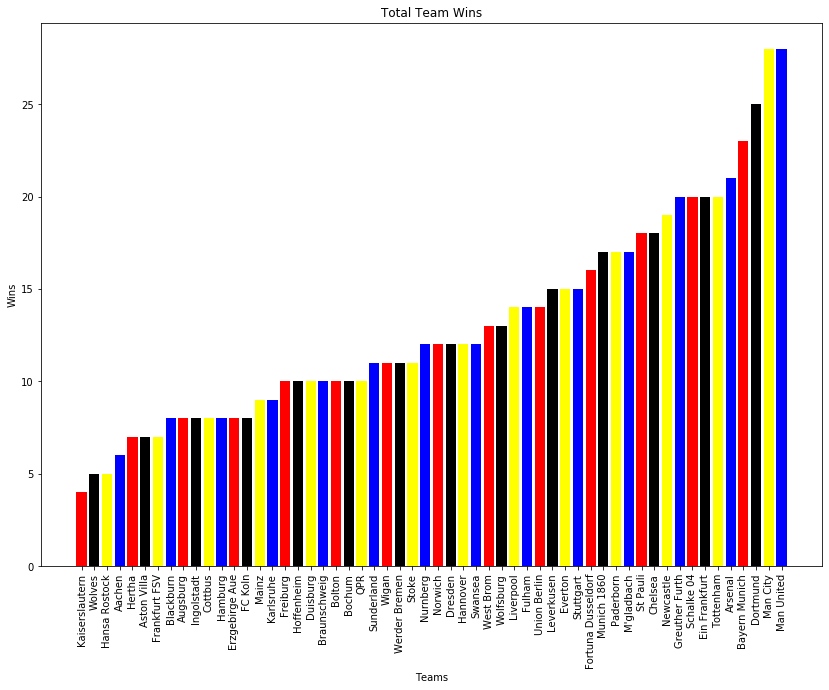

In [231]:
plt.figure(figsize = (14, 10))
dfTemp=dfNew.sort_values(["TotalWin"])
plt.bar(dfTemp["Team"],dfTemp["TotalWin"],color=['red', 'black', 'yellow','blue'])
plt.xticks(x, rotation=90)
plt.xlabel("Teams")
plt.ylabel("Wins")
plt.title("Total Team Wins")
plt.show()

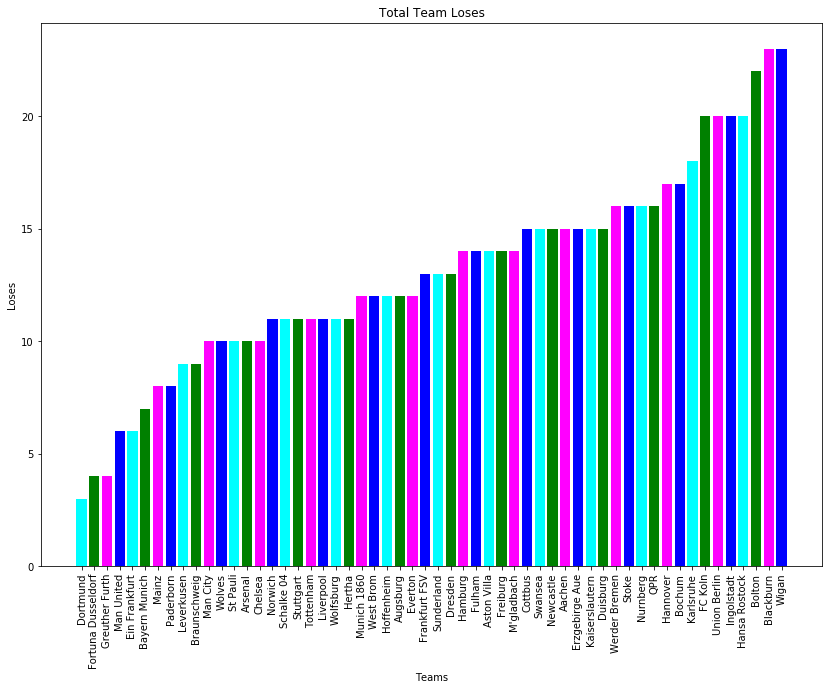

In [234]:
plt.figure(figsize = (14, 10))

dfTemp=dfNew.sort_values(["TotalLoss"])
plt.bar(dfTemp["Team"],dfTemp["TotalLoss"],color=['cyan', 'green', 'magenta','blue'])

plt.xticks(x, rotation=90)
plt.xlabel("Teams")
plt.ylabel("Loses")
plt.title("Total Team Loses")
plt.show()

## <p style="color:maroon"> 3) The team's win percentage on days where it was raining during games in the 2011 season. </p>

In [95]:
import datetime
import requests
from api_key import key

#4efaf5efcae99d58fef159c34d23ff28
#16ff9b4d89256c89ce3d1af54b4294de
key="16ff9b4d89256c89ce3d1af54b4294de"
s=cur.execute("""SELECT Date, HomeTeam, AwayTeam FROM Matches WHERE Season=2011 ;""" ).fetchall()
df=pd.DataFrame(s)
df.columns=[x[0] for x in cur.description]
len(df)

992

In [96]:
#Change date to timestamp
def dateToTimeStamp(date):
    return int(datetime.datetime.strptime(date, "%Y-%m-%d").timestamp())

In [97]:
dateToTimeStamp("2011-12-11") #Test

1323583200

In [107]:
#Add timeStamp to make a new URL
def fixURL(timeStamp):
    url="https://api.darksky.net/forecast/{}/52.5200,13.4050,".format(key)
    return url+str(timeStamp)+"?exclude=currently,hourly"

In [108]:
#Function that get the weather in the Data Frame. 
def weatherStatus(url):
    data=requests.get(url)
    dataSet=data.json()
    try: 
        if 'precipType' in dataSet["daily"]["data"][0].keys():
            return dataSet["daily"]["data"][0]['precipType']
    except:
        return 0

In [109]:
#Test
# url="https://api.darksky.net/forecast/16ff9b4d89256c89ce3d1af54b4294de/52.5200,-13.4050,1568343600"
# data=requests.get(url)
url=""
print(dateToTimeStamp("2011-12-11"))
# url=fixURL(dateToTimeStamp("2011-12-11"))
url="https://api.darksky.net/forecast/16ff9b4d89256c89ce3d1af54b4294de/52.5200,13.4050,1568343600?exclude=currently,hourly"
print(weatherStatus(url))


1323583200
rain


In [110]:
#https://api.darksky.net/forecast/16ff9b4d89256c89ce3d1af54b4294de/52.5200,-13.4050,1568343600?exclude=currently,hourly

## <p style="color:red"> Stop! </p>

In [112]:
weatherList=[]
uniqueDate=df["Date"].unique()
something=pd.DataFrame({})
count=0
for i in uniqueDate:
    url=[]
    url=fixURL(dateToTimeStamp(i))
    weatherList.append(weatherStatus(url))
    print(i,weatherList[count])
    count+=1

2012-03-31 rain
2011-12-11 None
2011-08-13 None
2011-11-27 None
2012-02-18 None
2012-01-20 rain
2012-02-04 None
2012-04-21 None
2011-09-18 rain
2011-10-23 rain
2011-10-01 None
2012-03-03 None
2011-08-27 rain
2012-03-17 None
2011-11-06 rain
2012-05-05 rain
2012-04-11 None
2011-12-17 rain
2012-02-03 None
2011-10-29 None
2012-01-22 rain
2011-12-03 rain
2012-04-14 None
2012-03-25 None
2012-03-10 None
2012-04-07 None
2011-11-19 None
2011-10-14 None
2011-09-24 None
2012-04-28 None
2011-12-18 rain
2012-03-02 None
2012-03-16 None
2012-02-17 rain
2011-08-06 rain
2011-11-04 None
2011-09-16 None
2011-07-15 None
2012-05-06 rain
2012-02-11 None
2011-10-02 None
2012-03-30 None
2011-10-22 None
2011-08-26 rain
2011-08-07 rain
2012-02-24 rain
2011-07-17 rain
2012-02-12 None
2011-08-22 None
2011-09-09 rain
2012-04-01 None
2011-09-25 None
2012-04-20 None
2011-11-25 rain
2012-03-09 None
2011-11-07 None
2011-09-10 rain
2011-08-21 None
2011-09-26 None
2012-03-26 None
2011-10-30 rain
2012-02-13 None
2012-02-

## <p style="color:blue"> Ok now! </p>

In [121]:
#Convert and Test
weathers=[]
for i in weatherList:
    if i=="rain":
        weathers.append(1)
    else:
        weathers.append(0)
weathers[:10]

[1, 0, 0, 0, 0, 1, 0, 0, 1, 1]

In [131]:
#Full data
conn=sqlite3.connect('database.sqlite')
cur=conn.cursor()
s=cur.execute("""SELECT Date, HomeTeam, AwayTeam, FTR FROM Matches WHERE Season=2011 ;""" ).fetchall()
df=pd.DataFrame(s)
df.columns=[x[0] for x in cur.description]

In [132]:
#Create unique date and weather Dataframe
dateAndWeather=pd.DataFrame({"Date":uniqueDate,"Weather":weathers})

In [152]:
#Add copy weather from unique list to duplicated list
weatherFullList=[]
for date in df["Date"]:
    for index, dW in enumerate(dateAndWeather["Date"]):
        if date == dW:
            weatherFullList.append(dateAndWeather["Weather"][index]) 

df["Rainy?"]=weatherFullList
df.head()

,Date,HomeTeam,AwayTeam,FTR,Rainy?
0,2012-03-31,Nurnberg,Bayern Munich,A,1
1,2011-12-11,Stuttgart,Bayern Munich,A,0
2,2011-08-13,Wolfsburg,Bayern Munich,A,0
3,2011-11-27,Mainz,Bayern Munich,H,0
4,2012-02-18,Freiburg,Bayern Munich,D,0


In [291]:
#Win game when raining
import numpy as np
WWRHomeList=[]
for i in df["HomeTeam"].unique():
    WWRHomeList.append(len(df[(df["HomeTeam"]==i)&(df["Rainy?"]==1)&(df["FTR"]=="H")]))

WWRAwayList=[]
for i in df["AwayTeam"].unique():
    WWRAwayList.append(len(df[(df["AwayTeam"]==i)&(df["Rainy?"]==1)&(df["FTR"]=="A")]))
len(WWRAwayList)

WWR=np.array(WWRHomeList)+np.array(WWRAwayList)
WWR

array([7, 5, 2, 2, 2, 5, 2, 6, 2, 6, 3, 6, 3, 2, 5, 5, 4, 4, 1, 2, 7, 5,
       8, 8, 3, 3, 7, 1, 6, 6, 5, 3, 4, 2, 4, 4, 1, 5, 5, 4, 6, 3, 7, 8,
       8, 7, 1, 6, 2, 3, 3, 5, 4, 1, 9, 9])

In [292]:
#Total game when raining

TGWRList=[]
for i in df["HomeTeam"].unique():
    TGWRList.append(len(df[(df["HomeTeam"]==i)|(df["AwayTeam"]==i)&(df["Rainy?"]==1)]))
    
TGWRList=np.array(TGWRList)
TGWRList

array([20, 20, 26, 23, 24, 22, 26, 21, 24, 21, 22, 23, 23, 20, 21, 22, 22,
       24, 24, 23, 22, 24, 25, 22, 24, 22, 22, 23, 22, 25, 25, 24, 22, 21,
       26, 22, 22, 22, 24, 25, 23, 24, 27, 27, 27, 24, 22, 28, 27, 27, 27,
       25, 26, 23, 27, 26])

In [296]:
#Combine wins, total game
dffoo=pd.DataFrame({})
dffoo["Team"] = df["HomeTeam"].unique()
dffoo["TotalGame"]= dfNew["TotalWin"]+dfNew["TotalLoss"]+dfNew["TotalDraw"]
dffoo["TotalWin"]=dfNew["TotalWin"]
dffoo["WwR"]=WWR
dffoo["TGwR"]=TGWRList
dffoo["PercentWwR"]=(WWR/TGWRList)*100

#Reindex
newindex=pd.Series(list(range(dffoo.shape[0])))
dffoo=dffoo.set_index(newindex)
dffoo.head()

,Team,TotalGame,TotalWin,WwR,TGwR,PercentWwR
0,Nurnberg,34,6,7,20,35.000000
1,Stuttgart,38,21,5,20,25.000000
2,Wolfsburg,38,7,2,26,7.692308
3,Mainz,34,8,2,23,8.695652
4,Freiburg,34,23,2,24,8.333333


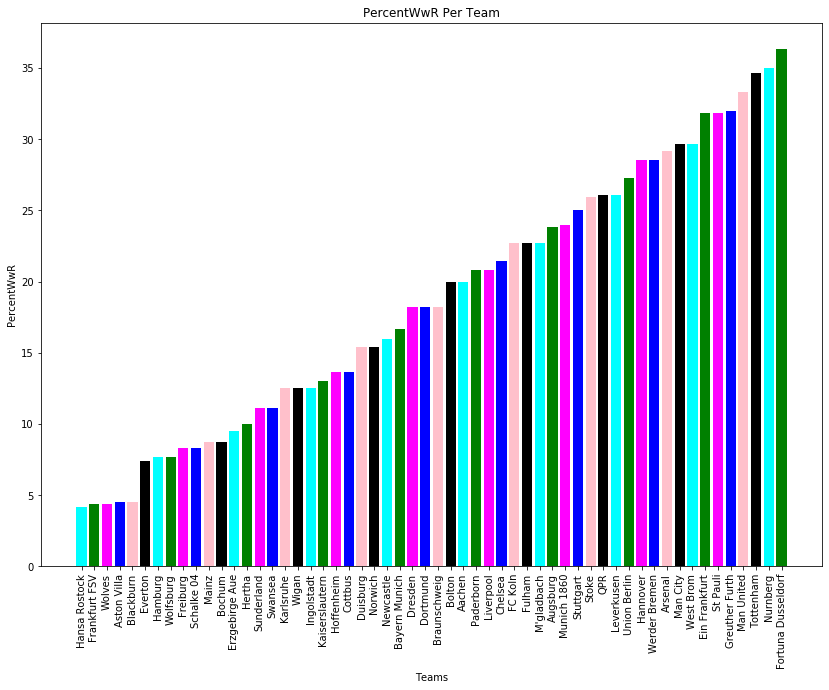

In [298]:
plt.figure(figsize = (14, 10))

dfTemp=dffoo.sort_values(["PercentWwR"])
plt.bar(dfTemp["Team"],dfTemp["PercentWwR"],color=['cyan', 'green', 'magenta','blue','pink','black'])

plt.xticks(x, rotation=90)
plt.xlabel("Teams")
plt.ylabel("PercentWwR")
plt.title("PercentWwR Per Team")
plt.show()